<a href="https://colab.research.google.com/github/ohalete/MSc_Project/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('PIMA_DATASET.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train the KNN classifier
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy:", accuracy*100)

Accuracy: 0.7229437229437229
Accuracy: 72.2943722943723


In [ ]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[125  34]
 [ 30  42]]


In [ ]:
# Assuming cm is the original confusion matrix with a total of 231 instances
# Calculate the scaling factor
scaling_factor = 230 / np.sum(cm)

# Scale down the values in the confusion matrix
scaled_knn = cm * scaling_factor

# Print the scaled confusion matrix
print("Scaled Confusion Matrix (230 instances):")
print(scaled_knn)

Scaled Confusion Matrix (230 instances):
[[124.45887446  33.85281385]
 [ 29.87012987  41.81818182]]


In [ ]:
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test = knn.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.82
Test Accuracy: 0.72


In [ ]:
# Assuming cm is the confusion matrix

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate error rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Print error rates
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

# Calculate TPR (Sensitivity or Recall)
TPR = TP / (TP + FN)

# Calculate TNR (Specificity)
TNR = TN / (TN + FP)

# Print TPR and TNR
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

False Positive Rate (FPR): 0.2138364779874214
False Negative Rate (FNR): 0.4166666666666667
True Positive Rate (TPR): 0.5833333333333334
True Negative Rate (TNR): 0.7861635220125787


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       159
           1       0.55      0.58      0.57        72

    accuracy                           0.72       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.73      0.72      0.72       231



In [ ]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

# Calculate RAE
rae = mae / (abs(y_test - y_test.mean()).sum())
print("RAE:", rae)

# Calculate RRSE
rrse = (rmse ** 2) / (mse.sum())
print("RRSE:", rrse)

MAE: 0.27705627705627706
RMSE: 0.5263613559678152
RAE: 0.0027952480782669456
RRSE: 1.0


In [ ]:
# Predict probabilities for the test set
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate MCC
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
print("MCC:", mcc)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Calculate PRC curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
prc_auc = auc(recall, precision)
print("PRC AUC:", prc_auc)

MCC: 0.3642528108283687
ROC AUC: 0.7546733053808525
PRC AUC: 0.5666058244716261


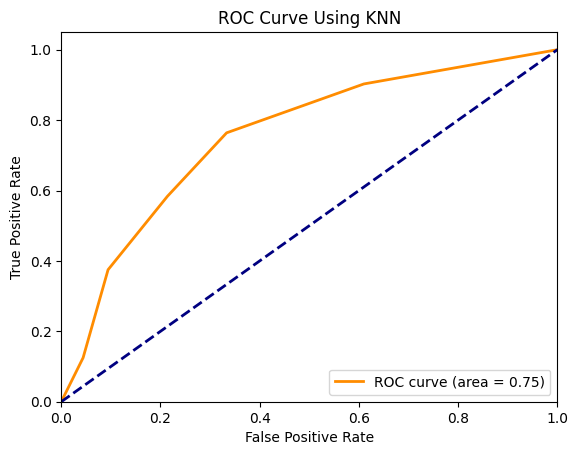

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic')
plt.title('ROC Curve Using KNN')
plt.legend(loc="lower right")
plt.savefig("KNN_ROC.jpg")
plt.show()

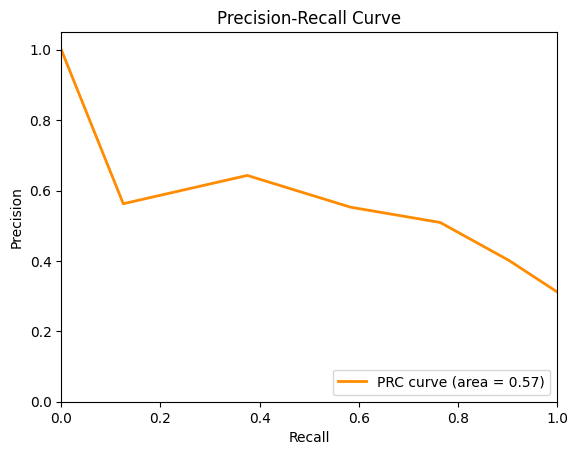

In [ ]:
# Plot PRC curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
tn0, fp0, fn0, tp0 = cm.ravel()  # Class 0
tn1, fp1, fn1, tp1 = cm.ravel()[::-1]  # Class 1

In [ ]:
tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)

tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)

In [ ]:
print("tp_rate0:", tp_rate0)
print("tp_rate1:", tp_rate1)

print("fp_rate0:", fp_rate0)
print("fp_rate1:", fp_rate1)

tp_rate0: 0.5833333333333334
tp_rate1: 0.7861635220125787
fp_rate0: 0.2138364779874214
fp_rate1: 0.4166666666666667


In [ ]:
weighted_tp = tp * 0.7
weighted_fp = fp * 0.3

In [ ]:
weighted_tp_rate = (tp_rate0 + tp_rate1)/2
print("weighted_tp_rate:", weighted_tp_rate)

weighted_fp_rate = (fp_rate0 + fp_rate1)/2
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.6847484276729561
weighted_fp_rate: 0.31525157232704404


In [ ]:
weighted_tp_rate = weighted_tp / (weighted_tp + fn)
weighted_fp_rate = weighted_fp / (weighted_fp + tn)

print("weighted_tp_rate:", weighted_tp_rate)
print("weighted_fp_rate:", weighted_fp_rate)

weighted_tp_rate: 0.4949494949494949
weighted_fp_rate: 0.07544378698224852
